In [1]:
import pandas as pd

In [2]:
# Using data generated from rho_enrich_var_struct_clust_dca.ipynb
aa_var_df = pd.read_pickle('./aa_var_df.pkl')
display(len(aa_var_df), aa_var_df)

66

,DesignId,AA position,norm_score,condition,variant source,AA ref seq,AA seq change,EditType,var annot
0,9837668,257,0.326110,butanediol,WT alleleome,V,A,Substitution,A
0,9839658,176,0.327265,butanediol,WT alleleome,C,Y,Substitution,Y
0,9843235,315,0.357309,butanediol,ALEdb,G,S,Substitution,S
0,9835915,259,0.346128,diaminobutane,ALEdb,D,E,Substitution,E
0,9836449,57,0.318088,diaminobutane,WT alleleome,T,I,Substitution,I
...,...,...,...,...,...,...,...,...,...
0,9843482,279,0.446640,octanoate,ALEdb,G,V,Substitution,V
0,9843493,233,0.608316,octanoate,ALEdb,D,G,Substitution,G
0,9843497,34,0.467710,octanoate,ICT ALE,G,V,Substitution,V
0,9843524,36,0.466320,octanoate,ALEdb,G,V,Substitution,V


In [3]:
# Want the variants to be unique
# aa_var_df = aa_var_df.drop_duplicates()  # seems like I should rename the results as uniq_aa_var_df
uniq_aa_var_df = aa_var_df[['AA position', 'AA ref seq', 'AA seq change',
                            'variant source'
                            ]].copy().drop_duplicates()
len(uniq_aa_var_df)

46

In [4]:
# Having to do this since there's a bug in ssbio

_aa_property_dict_one = {
    'Aliphatic': {'A', 'I', 'L', 'V'},
    'Aromatic' : {'F', 'H', 'W', 'Y'},
    'Non-polar': {'A', 'C', 'F', 'G', 'I', 'L', 'M', 'P', 'V', 'W', 'Y'},
    'Polar'    : {'D', 'E', 'H', 'K', 'N', 'Q', 'R', 'S', 'T'},
    'Charged'  : {'D', 'E', 'H', 'K', 'R'},
    'Basic'    : {'H', 'K', 'R'},
    'Acidic'   : {'D', 'E'},
#     'Small'    : {'A', 'C', 'D', 'G', 'N', 'P', 'S', 'T', 'V'}}  # I'm going to consider V in bulky according to paper that calls anything bigger than 18 A^2 as bulky https://www.sciencedirect.com/science/article/pii/0022519368900696
    # 'Small'    : {'A', 'C', 'D', 'G', 'N', 'P', 'S', 'T'},
    # 'Small'    : {'D', 'N', 'P',},  # Not overlapping with Tiny # Going to use another definition for volumn: https://www.sciencedirect.com/science/article/pii/0022519368900696
    # 'Tiny'     : {'A', 'C', 'G', 'S', 'T'}, # Going to use another definition for volumn: https://www.sciencedirect.com/science/article/pii/0022519368900696
    'Small': {'A', 'D', 'C', 'G', 'S'},  # https://www.sciencedirect.com/science/article/pii/0022519368900696
    'Medium': {'N', 'E', 'Q', 'H', 'P', 'T', 'V'},  # https://www.sciencedirect.com/science/article/pii/0022519368900696
    'Large': {'F', 'I', 'L', 'M', 'W', 'Y', 'R', 'K'},  # https://www.sciencedirect.com/science/article/pii/0022519368900696
}

EXTENDED_AA_PROPERTY_DICT_ONE = {}
# EXTENDED_AA_PROPERTY_DICT_ONE['Bulky'] = {'L', 'I', 'F', 'Y', 'V', 'W'}  # https://www.sciencedirect.com/science/article/pii/0022519368900696
EXTENDED_AA_PROPERTY_DICT_ONE['Hydrophobic'] = {'L', 'M', 'F', 'W', 'C', 'A', 'V', 'G', 'I', 'Y', 'H', 'T', 'S','P'}  # http://www.russelllab.org/aas/hydrophobic.html
EXTENDED_AA_PROPERTY_DICT_ONE['Iron binding'] = {'D', 'E', 'Y', 'H', 'C'}  # http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0007269
EXTENDED_AA_PROPERTY_DICT_ONE['Disorder promoting'] = {'P', 'E', 'S', 'K', 'Q', 'G'}  # https://www.sciencedirect.com/science/article/pii/S1570963912002889
# EXTENDED_AA_PROPERTY_DICT_ONE['Disorder promoting if in secstruct'] = {'G', 'P'}  # https://www.sciencedirect.com/science/article/pii/S2211124714003751
EXTENDED_AA_PROPERTY_DICT_ONE['Order promoting'] = {'W', 'F', 'Y', 'I','M'}  # https://www.sciencedirect.com/science/article/pii/S2211124714003751 https://www.sciencedirect.com/science/article/pii/S1570963912002889#bb0185
EXTENDED_AA_PROPERTY_DICT_ONE['Carbonylation suscept'] = {'P', 'R', 'K', 'T'}  # http://onlinelibrary.wiley.com/doi/10.1002/pmic.201100223/full
EXTENDED_AA_PROPERTY_DICT_ONE['Oxygen rich'] = {'D', 'E', 'N', 'Q', 'S', 'T', 'Y'}  # http://www.sciencedirect.com/science/article/pii/S2211124714003751
EXTENDED_AA_PROPERTY_DICT_ONE['Prone to photooxidation'] = {'C', 'H', 'W', 'M','Y'}  # listed in decreasing order, https://www.sciencedirect.com/science/article/pii/S1011134401002081
# EXTENDED_AA_PROPERTY_DICT_ONE['Pathogen enriched'] = {'G', 'P', 'R', 'S'}  # https://www.sciencedirect.com/science/article/pii/S2211124714003751
EXTENDED_AA_PROPERTY_DICT_ONE['TM stabilizing'] = {'T', 'C', 'S'}  # http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0003343
EXTENDED_AA_PROPERTY_DICT_ONE['TM to Thr stabilizing'] = {'I', 'M', 'V', 'A'}  # http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0003343

# Not using the below since not considering it a basic property current worth investigating
# I've added these from the _human_readable_pepstats dictionary within ssbio/protein/sequence/properties/residues.py
EXTENDED_AA_PROPERTY_DICT_ONE["common in helix"] = {'V', 'I', 'Y', 'F', 'W', 'L'}
EXTENDED_AA_PROPERTY_DICT_ONE["common in turn"] = {'N', 'P', 'G', 'S'}
EXTENDED_AA_PROPERTY_DICT_ONE["common in sheet"] = {'E', 'M', 'A', 'L'}


from copy import deepcopy

def characterize_residue_mutation(res1, res2, use_extended_def=True):
    res1_props = []
    res2_props = []

    propdict = deepcopy(_aa_property_dict_one)

    if use_extended_def:
        propdict.update(EXTENDED_AA_PROPERTY_DICT_ONE)

    for prop, aa_list in propdict.items():  # bug is here; EXTENDED_AA_PROPERTY_DICT_ONE is used instead of propdict
        if res1 in aa_list:
            res1_props.append(prop)
        if res2 in aa_list:
            res2_props.append(prop)

    return {res1: res1_props,
            res2: res2_props}

In [5]:
# each of these keys are columns in final DF
prop_type_d = {
    
    # states describe a spectrum
    # 2 states (<blank> is a state)
    'charged': {'Charged'},
    'iron binding': {'Iron binding'},
    'carbonylation': {'Carbonylation suscept'},
    'oxygen rich': {'Oxygen rich'},
    'photooxidation': {'Prone to photooxidation'},
    'hydrophobic': {'Hydrophobic'},

    # 3 states describing a spectrum(<blank> is a state)
    'pH': {'Basic', 'Acidic'},
    'polar': {'Non-polar', 'Polar'},
    'order': {'Order promoting', 'Disorder promoting'},
    'size': {'Tiny', 'Small', 'Bulky'},
    
    # 3 categorical states (<blank> is a state)
    # 'chain type': {'Aliphatic', 'Aromatic'},
    'TM stabilizing': {'TM stabilizing', 'TM to Thr stabilizing'},
    # 'common in': {"helix", "turn", "sheet"}  # Not using this since not considering it a basic property current worth investigating
}

In [6]:
# The below is copied from ssbio due to issues running the package with it's imports that are unnecessary for my work.
from Bio.PDB.Polypeptide import one_to_three, three_to_one


kd_hydrophobicity_one = {'A': 1.8, 'R': -4.5, 'N': -3.5, 'D': -3.5, 'C': 2.5,
                         'Q': -3.5, 'E': -3.5, 'G': -0.4, 'H': -3.2, 'I': 4.5,
                         'L': 3.8, 'K': -3.9, 'M': 1.9, 'F': 2.8, 'P': -1.6,
                         'S': -0.8, 'T': -0.7, 'W': -0.9, 'Y': -1.3, 'V': 4.2}
aa_hydro_d = kd_hydrophobicity_one


bulkiness_three = {'Ala': 11.500,
                   'Arg': 14.280,
                   'Asn': 12.820,
                   'Asp': 11.680,
                   'Cys': 13.460,
                   'Gln': 14.450,
                   'Glu': 13.570,
                   'Gly': 3.400,
                   'His': 13.690,
                   'Ile': 21.400,
                   'Leu': 21.400,
                   'Lys': 15.710,
                   'Met': 16.250,
                   'Phe': 19.800,
                   'Pro': 17.430,
                   'Ser': 9.470,
                   'Thr': 15.770,
                   'Trp': 21.670,
                   'Tyr': 18.030,
                   'Val': 21.570}
bulkiness_one = {three_to_one(k.upper()): v for k, v in bulkiness_three.items()}
aa_bulki_d = bulkiness_one


_aa_flexibility_dict_one = {'A': -0.605,
                            'C': -0.692,
                            'D': -0.279,
                            'E': -0.16,
                            'F': -0.719,
                            'G': -0.537,
                            'H': -0.662,
                            'I': -0.682,
                            'K': -0.043,
                            'L': -0.631,
                            'M': -0.626,
                            'N': -0.381,
                            'P': -0.271,
                            'Q': -0.368,
                            'R': -0.448,
                            'S': -0.424,
                            'T': -0.525,
                            'V': -0.669,
                            'W': -0.727,
                            'Y': -0.721}
aa_flex_d = _aa_flexibility_dict_one


# Values are level of flexibility with 1 being smallest and 5 being largest.
# 0 means measurable no flexibility
aa_flex_cat_d_three = {  # https://doi.org/10.1002/(SICI)1097-0134(20000515)39:3%3C261::AID-PROT90%3E3.0.CO;2-4  
    # Paper says "Side chain conformational changes in proline were not considered since they are
    # invariably accompanied by changes in backbone conformation. Glycine and alanine do
    # not have any rotatable bonds"
    'Pro': 0, 'Gly': 0, 'Ala': 0,
    'Cys':1, 'Trp':1, 'Phe':1,
    'Asn':2, 'Thr':2, 'Val':2, 'Tyr':2, 'Ser':2, 'His':2, 'Asp':2,
    'Glu':3, 'Ile':3, 'Leu':3,
    'Arg':4, 'Gln':4, 'Met':4,
    'Lys':5
}
aa_flex_cat_d = {three_to_one(k.upper()): v for k, v in aa_flex_cat_d_three.items()}

In [7]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import util.const as const


# TODO: fix warnings when I get the time
import warnings
warnings.filterwarnings("ignore")


prop_mat = pd.DataFrame()  # only for non-syn AA subs

for _, r in uniq_aa_var_df.iterrows():
    pos = r['AA position']
    aa1 = r["AA ref seq"]
    aa2 = r["AA seq change"]
    row_d = {"position": pos, "AA": (aa1, aa2),
    'source':r['variant source']
    }
    
    props = characterize_residue_mutation(aa1, aa2, use_extended_def=True)
    for prop, possible_prop_states in prop_type_d.items():
        
        row_d[prop] = ''
        
        # set operations to grab those states linked with current "prop"
        aa1_prop_state_str = '+'.join(possible_prop_states & set(props[aa1]))
        aa2_prop_state_str = '+'.join(possible_prop_states & set(props[aa2]))
        
        # Properties only involving 1 explicit state (therefore 2 states total)
        if prop in ['charged', 'iron binding', 'canrbonylation', 'oxygen rich',
        'photooxidation', 'pH', 'polar', 'order', 'hydrophobic']:
            if aa2_prop_state_str != aa1_prop_state_str:
                if aa2_prop_state_str != '':
                    row_d[prop] = "more " + aa2_prop_state_str
                if (aa2_prop_state_str == '') & (aa1_prop_state_str != ''):
                    row_d[prop] = "less " + aa1_prop_state_str
        
        # if prop in ['chain type', 'TM stabilizing', 'common in', 'size']:
        if prop in ['chain type', 'TM stabilizing', 'common in']:
            if aa2_prop_state_str != aa1_prop_state_str:
                if aa2_prop_state_str == '':
                    aa2_prop_state_str = "no " + prop
                # if prop == 'size':
                #     aa2_prop_state_str = aa2_prop_state_str + " sidechain"
                row_d[prop] = aa2_prop_state_str  # the final property is where the valuable information is for this type of analysis
        
        # working to collapse 3 categories into just 2 (smaller and larger)
        if prop in ['size']:
            if aa2_prop_state_str != aa1_prop_state_str:
                if ((aa2_prop_state_str == 'Medium') & (aa1_prop_state_str == 'Small')):
                    aa2_prop_state_str = "Large"
                if ((aa2_prop_state_str == 'Medium') & (aa1_prop_state_str == 'Large')):
                    aa2_prop_state_str = "Small"
                if aa2_prop_state_str == "Large":
                    aa2_prop_state_str = aa2_prop_state_str + "r sidechain"
                if aa2_prop_state_str == "Small":
                    aa2_prop_state_str = aa2_prop_state_str + "er sidechain"
                row_d[prop] = aa2_prop_state_str
                

    row_d["flex diff"] = ''
    if (aa_flex_cat_d[aa2] > aa_flex_cat_d[aa1]):
        row_d["flex diff"] = "more Flexible"
    if (aa_flex_cat_d[aa2] < aa_flex_cat_d[aa1]):
        row_d["flex diff"] = "less Flexible"

    # # Using categorical data for these properties instead of values to remove noise due to small changes in values.
    # row_d["size diff"] = ''  # case for no change
    # if (aa_bulki_d[aa2] - aa_bulki_d[aa1]) > 0: row_d["size diff"] = 'larger Sidechain'
    # if (aa_bulki_d[aa2] - aa_bulki_d[aa1]) < 0: row_d["size diff"] = 'smaller Sidechain'
    # row_d["hydrophobic"] = ''
    # if (aa_hydro_d[aa2] - aa_hydro_d[aa1]) > 0: row_d["hydrophobic"] = 'more Hydrophobic'
    # if (aa_hydro_d[aa2] - aa_hydro_d[aa1]) < 0: row_d["hydrophobic"] = 'less Hydrophobic'

    # row_d["Grantham score"] = ''
    # gs = const.GRANTHAM_SCORE_MAT[(aa1, aa2)]
    # if gs > 100:
    #     row_d["Grantham score"] = "radical (Grantham)"
    # elif gs > 60:
    #     row_d["Grantham score"] = "non-conservative (Grantham)"
    # else:
    #     row_d["Grantham score"] = "conservative (Grantham)"
    
    # row_d["deleterious"] = "deleterious (SIFT)" if r["deleterious (SIFT)"] else ""
    # row_d["structurally destabilizing"] = "Structurally destabilizing (ΔΔGpred)" if r["structurally destabilizing (ΔΔGpred)"] else ""
    
#     sub_genic_feats = _get_mut_subgenic_feats(r["AA range"], gff_df)  # TODO: if not on feature, populate this with "nearest" feature in 3D space.
#     TODO: can also add what conditions the mutations are statistically associated with and what other mutated features the mutations are correlated with
    
    prop_mat = prop_mat.append(row_d, ignore_index=True)
    
prop_mat["position"] = prop_mat["position"].astype(int)
prop_mat = prop_mat.sort_values(by=["position"])
prop_mat = prop_mat.set_index("position")
prop_mat = prop_mat.sort_index(axis=1)
display(len(prop_mat), prop_mat.head())

46

,AA,TM stabilizing,carbonylation,charged,flex diff,hydrophobic,iron binding,order,oxygen rich,pH,photooxidation,polar,size,source
position,,,,,,,,,,,,,,
16,"(I, N)",no TM stabilizing,,,less Flexible,less Hydrophobic,,less Order promoting,more Oxygen rich,,,more Polar,,WT alleleome
34,"(G, V)",TM to Thr stabilizing,,,more Flexible,,,less Disorder promoting,,,,,,ICT ALE
36,"(G, C)",TM stabilizing,,,more Flexible,,more Iron binding,less Disorder promoting,,,more Prone to photooxidation,,,ALEdb
36,"(G, V)",TM to Thr stabilizing,,,more Flexible,,,less Disorder promoting,,,,,,ALEdb
36,"(G, R)",,,more Charged,more Flexible,less Hydrophobic,,less Disorder promoting,,more Basic,,more Polar,,ALEdb


In [8]:
# clust_prop_mat = prop_mat[prop_mat.index < 131].copy()  # just want to look at the first cluster
clust_prop_mat = prop_mat.copy()  # Want to look at all variants.

In [9]:
def _get_prop_cnt_mat(prop_mat):

    df = prop_mat.copy().drop(columns=["AA",
                                            'source'  # Don't want source in the clustermap
                                            ])
    unique_prop_changes = set()
    for _, r in df.iterrows():
        unique_prop_changes |= set(r)
    unique_prop_changes.remove('')


    clust_res_prop_cnt_mat = pd.DataFrame(0, index=set(prop_mat.index), columns=unique_prop_changes)
    for res_pos, sub_props in df.iterrows():
        for sub_prop in sub_props:
            if sub_prop != '':
                clust_res_prop_cnt_mat.at[res_pos, sub_prop] += 1

    clust_res_prop_cnt_mat = clust_res_prop_cnt_mat.loc[:, (clust_res_prop_cnt_mat != 0).any(axis=0)]  # Remove columns with all 0s (I think; legacy code)
    return clust_res_prop_cnt_mat

clust_res_prop_cnt_mat = _get_prop_cnt_mat(clust_prop_mat)
clust_res_prop_cnt_mat

,less Charged,TM stabilizing,less Flexible,less Hydrophobic,more Charged,more Non-polar,less Iron binding,less Basic,less Oxygen rich,Smaller sidechain,...,more Flexible,less Prone to photooxidation,less Order promoting,less Acidic,no TM stabilizing,more Basic,more Iron binding,more Oxygen rich,less Disorder promoting,more Disorder promoting
257,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
259,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
267,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
16,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
273,2,0,2,0,0,2,2,0,2,1,...,0,0,0,2,0,0,0,0,1,0
274,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
147,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
279,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [10]:
res_prop_cnt_df = pd.DataFrame(0, columns=prop_mat['source'].unique(), index=set(clust_res_prop_cnt_mat.index))

for s in prop_mat['source'].unique():
    src_prop_mat = prop_mat[prop_mat['source']==s]
    src_prop_cnt_mat = _get_prop_cnt_mat(src_prop_mat)
    src_prop_cnt_mat["prop count"] = src_prop_cnt_mat.sum(axis=1)
    src_prop_cnt_mat = src_prop_cnt_mat[['prop count']]
    for res, r in src_prop_cnt_mat.iterrows():
        res_prop_cnt_df.at[res, s] += r['prop count']

res_prop_cnt_df.head()

,WT alleleome,ICT ALE,ALEdb
257,2,0,0
259,0,0,2
267,4,0,0
16,6,0,0
273,0,17,0


In [11]:
prop_chng_cnt_df = pd.DataFrame(0, columns=prop_mat['source'].unique(), index=set(clust_res_prop_cnt_mat.columns))

# very similar to res_prop_cnt_df
for s in prop_mat['source'].unique():
    src_prop_mat = prop_mat[prop_mat['source']==s]
    src_prop_cnt_mat = _get_prop_cnt_mat(src_prop_mat)
    src_prop_cnt_mat = src_prop_cnt_mat.T
    src_prop_cnt_mat["prop count"] = src_prop_cnt_mat.sum(axis=1)
    src_prop_cnt_mat = src_prop_cnt_mat[['prop count']]
    for prop, r in src_prop_cnt_mat.iterrows():
        prop_chng_cnt_df.at[prop, s] += r['prop count']

prop_chng_cnt_df.head()

,WT alleleome,ICT ALE,ALEdb
TM stabilizing,7,1,2
less Iron binding,2,2,1
more Charged,1,0,1
more Non-polar,6,2,3
less Basic,3,1,0


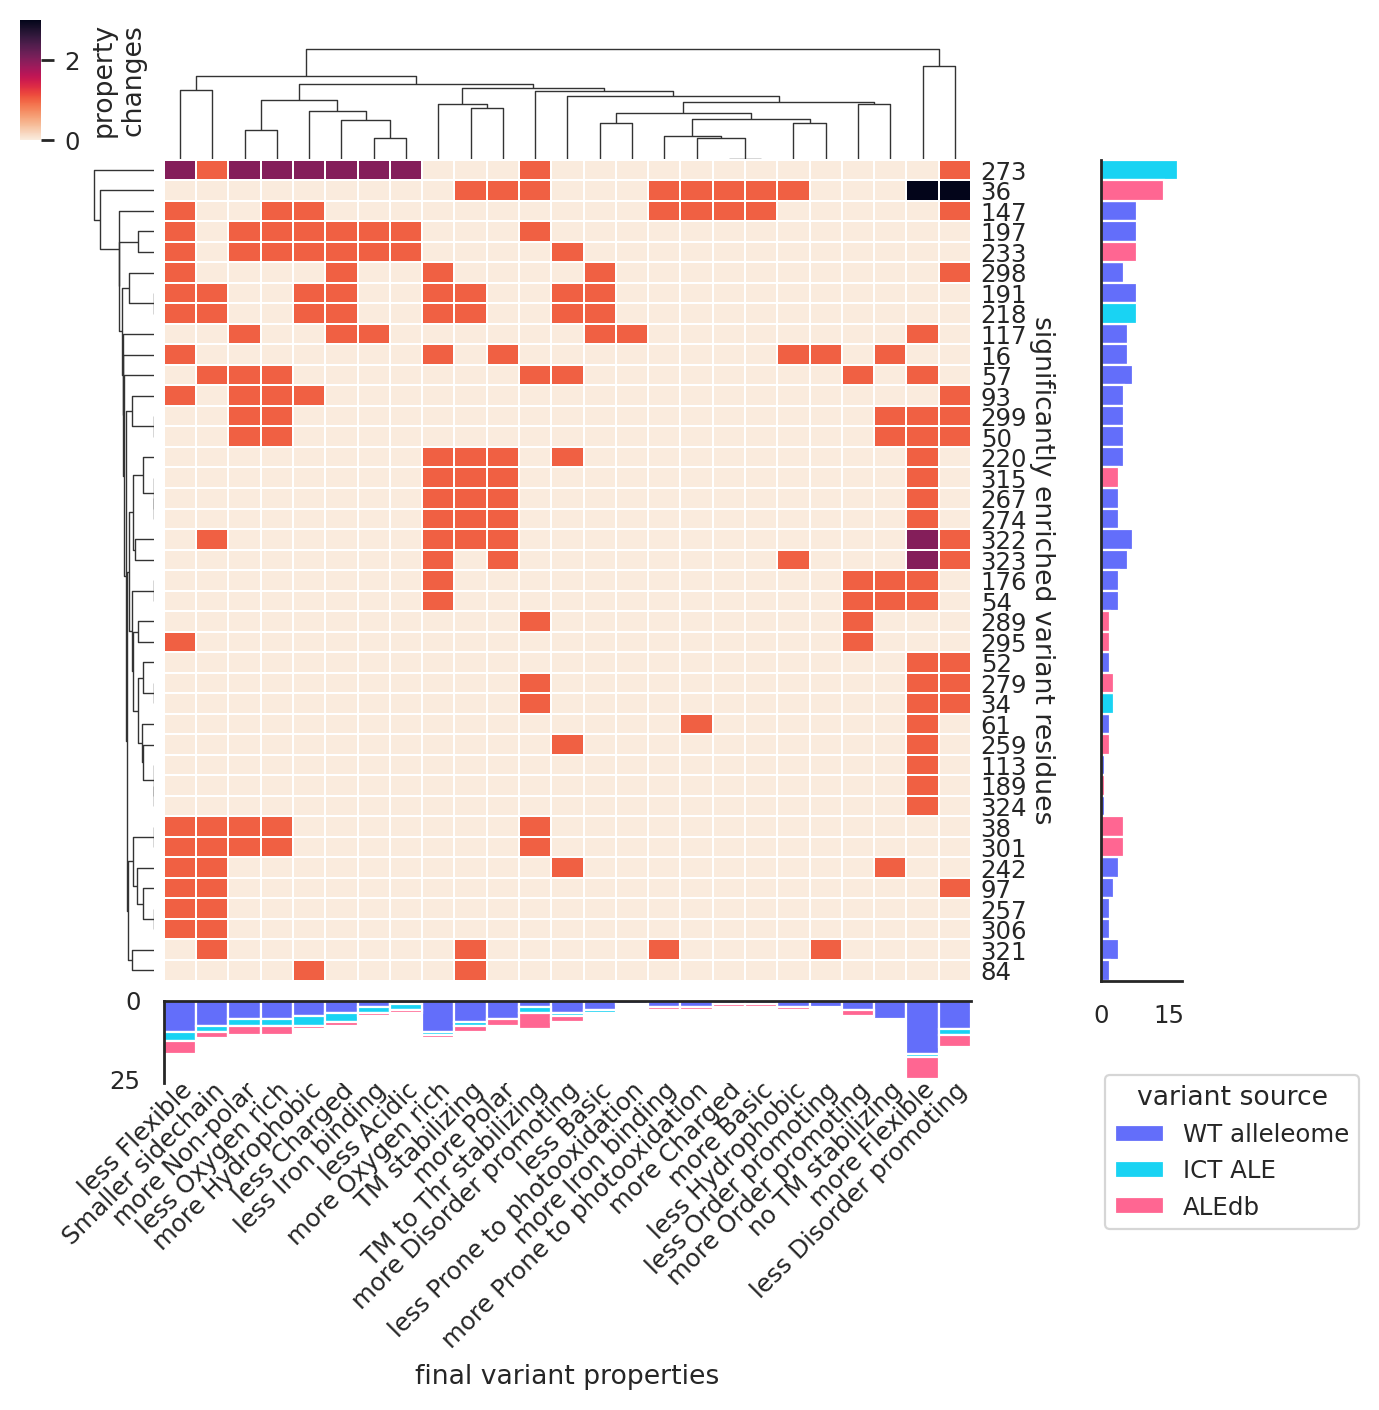

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import util.const as const

from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from matplotlib.ticker import MaxNLocator
plt.rcParams["figure.dpi"] = 200
sns.set_context("paper")
sns.set_style("white")
    

cm = sns.clustermap(
    clust_res_prop_cnt_mat,
    cmap="rocket_r", linewidth=0.1,
    figsize=(7,8),
    yticklabels=True,
    xticklabels=True,
    cbar_kws={'label': 'property\nchanges'},
    cbar_pos=(0.1, 0.85, 0.015, 0.075),  # top-left
    # cbar_pos=(0.8, 0, 0.015, 0.10),  # bottom-right
)
# cm.ax_heatmap.tick_params(axis='both', which='both', length=0)
cm.ax_heatmap.tick_params(axis='y', which='both', length=0)
cm.ax_heatmap.tick_params(axis='x', which='both', length=0, pad=35)
cm.ax_heatmap.set_xlabel('final variant properties')
cm.ax_heatmap.set_ylabel('significantly enriched variant residues', rotation=270, labelpad=10)

plt.setp(cm.ax_heatmap.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(cm.ax_heatmap.get_yticklabels(), rotation=0)

# divide existing axes
heatmap_space = make_axes_locatable(cm.ax_heatmap)
col_dendo_space = make_axes_locatable(cm.ax_col_dendrogram)
row_dendo_space = make_axes_locatable(cm.ax_row_dendrogram)

res_prop_chng_cnt_ax = heatmap_space.append_axes("right", size="10%", pad=0.65)
prop_chng_cnt_ax = heatmap_space.append_axes("bottom", size="10%", pad=0.1)

# create empty space of same size as bar plot axes (don't use this space)
nax = col_dendo_space.new_horizontal(size="10%", pad=0.65)
nay = row_dendo_space.new_vertical(size="10%", pad=0.1, pack_start=True)  # pack_start describes on what end the dendogram padding is applied

# Sort the values for the bar plot to have the same order as clusters
cm_y_tick_order = [int(t.get_text()) for t in np.array(cm.ax_heatmap.get_yticklabels())]
cm_x_tick_order = [t.get_text() for t in np.array(cm.ax_heatmap.get_xticklabels())]


res_prop_cnt_df = res_prop_cnt_df.reindex(cm_y_tick_order)
res_prop_cnt_df.plot.barh(rot=0, stacked=True, ax=res_prop_chng_cnt_ax, width=1, color=const.VAR_SRC_COLOR_D,)
res_prop_chng_cnt_ax.spines['top'].set_visible(False)
res_prop_chng_cnt_ax.spines['right'].set_visible(False)
res_prop_chng_cnt_ax.set_ylim(-0.5,len(clust_res_prop_cnt_mat.index)-0.5)  # needed to align bar-plots with clustermap residues
res_prop_chng_cnt_ax.set_yticklabels([])
res_prop_chng_cnt_ax.invert_yaxis()
res_prop_chng_cnt_ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=1))
res_prop_chng_cnt_ax.legend(title='variant source',loc='upper left',bbox_to_anchor=(-0.1,-0.1))

prop_chng_cnt_df = prop_chng_cnt_df.reindex(cm_x_tick_order)
prop_chng_cnt_df.plot.bar(rot=0, stacked=True, ax=prop_chng_cnt_ax, width=1, color=const.VAR_SRC_COLOR_D,)
prop_chng_cnt_ax.spines['bottom'].set_visible(False)
prop_chng_cnt_ax.spines['right'].set_visible(False)
prop_chng_cnt_ax.set_xlim(-0.5,len(clust_res_prop_cnt_mat.columns)-0.5)  # needed to align bar-plots with clustermap residues
prop_chng_cnt_ax.set_xticklabels([])
prop_chng_cnt_ax.invert_yaxis()  # Make it upside-down
prop_chng_cnt_ax.set_xlabel("") # can be blank since same count as in heatmap
prop_chng_cnt_ax.legend().remove()

row_dend_pos = cm.ax_row_dendrogram.get_position()
cm.ax_row_dendrogram.set_position([row_dend_pos.x0+0.13, row_dend_pos.y0, row_dend_pos.width*0.25, row_dend_pos.height])

col_dend_pos = cm.ax_col_dendrogram.get_position()
cm.ax_col_dendrogram.set_position([col_dend_pos.x0, col_dend_pos.y0, col_dend_pos.width, col_dend_pos.height*0.5])

plt.show()